# Graphs and Networks

A Graph is defined as a set of nodes (or vertices) and a set of edges (linkes between nodes).

With a graph (or a network) a lot of the fundamental questions about how the social, economic, and technological worlds are connected can be adressed.

A good introduction into graph and network theory coud be found at: https://www.cs.cornell.edu/home/kleinber/networks-book/

Examples of graphs are: social networks, buyer -  supplier relationships, customer - product relationships, the internet and much more.

We will start with a small example of a social network: the Zachary karate club found at: http://konect.cc/networks/ucidata-zachary/

The Zachary karate club data have the following data:

It contains the TSV and related files of the ucidata-zachary network: This is the well-known and much-used Zachary karate club network.  The data was collected from the members of a university karate club by Wayne Zachary in 1977.  Each node represents a member of the club, and each edge represents a tie between two members of the club.  The network is undirected.  An often discussed problem using this dataset is to find the two groups of people into which the karate club split after an argument between two teachers. 



|Files               |                                                                  |
|--------------------|------------------------------------------------------------------|
|meta.ucidata-zachary|Metadata about the network                                        |
|out.ucidata-zachary |The adjacency matrix of the network in whitespace-separated values| 
|                    |format, with one edge per line                                    |


The meaning of the columns in out.ucidata-zachary are: 
- First column: ID of from node 
- Second column: ID of to node
- Third column (if present): weight or multiplicity of edge
- Fourth column (if present):  timestamp of edges Unix time

## Exercise:

- load the data out.ucidata-zachary and build a nx.Graph() object with it, use https://networkx.org/documentation/stable/reference/classes/index.html
- draw the graph with https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#
- add labels and color

In [1]:
with open("../inputs/ucidata-zachary/out.ucidata-zachary", "r") as f:
    rows = f.readlines()
print(rows)

['% sym unweighted\n', '% 78 34 34\n', '1 2\n', '1 3\n', '2 3\n', '1 4\n', '2 4\n', '3 4\n', '1 5\n', '1 6\n', '1 7\n', '5 7\n', '6 7\n', '1 8\n', '2 8\n', '3 8\n', '4 8\n', '1 9\n', '3 9\n', '3 10\n', '1 11\n', '5 11\n', '6 11\n', '1 12\n', '1 13\n', '4 13\n', '1 14\n', '2 14\n', '3 14\n', '4 14\n', '6 17\n', '7 17\n', '1 18\n', '2 18\n', '1 20\n', '2 20\n', '1 22\n', '2 22\n', '24 26\n', '25 26\n', '3 28\n', '24 28\n', '25 28\n', '3 29\n', '24 30\n', '27 30\n', '2 31\n', '9 31\n', '1 32\n', '25 32\n', '26 32\n', '29 32\n', '3 33\n', '9 33\n', '15 33\n', '16 33\n', '19 33\n', '21 33\n', '23 33\n', '24 33\n', '30 33\n', '31 33\n', '32 33\n', '9 34\n', '10 34\n', '14 34\n', '15 34\n', '16 34\n', '19 34\n', '20 34\n', '21 34\n', '23 34\n', '24 34\n', '27 34\n', '28 34\n', '29 34\n', '30 34\n', '31 34\n', '32 34\n', '33 34\n']


In [2]:
import networkx as nx

G = nx.Graph(name="karateclub")

delimiter = " "
for i,row in enumerate(rows):
    row = row.strip("\n")
    row = row.split(delimiter)
    if i > 1: #skip the first two rows
        source = row[0]
        target = row[1]
        G.add_edge(source, target)
        
print(G) 

Graph named 'karateclub' with 34 nodes and 78 edges


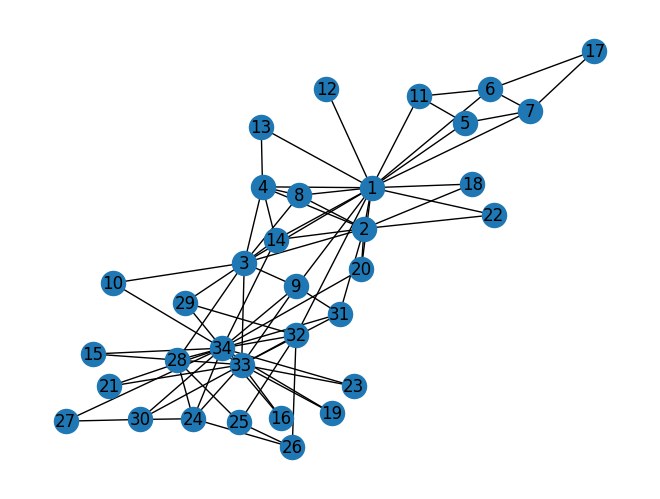

In [3]:
# print the graph
labels = {node:node for node in G}
nx.draw(G, labels=labels)

In [4]:
### choose a colormap
import matplotlib as mpl
print(dir(mpl.cm))

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'ColormapRegistry', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'Mapping', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'ScalarMappable', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', '_LUTSIZE', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_api', '_auto_norm_from_scale', '_colormaps', '_ensure_cmap', '_gen_cmap_registry',

In [5]:
# use degree as color
max_degree = max([d for (_,d) in G.degree()])
color = [d/max_degree for (n,d) in G.degree()]
print(G.degree())

[('1', 16), ('2', 9), ('3', 10), ('4', 6), ('5', 3), ('6', 4), ('7', 4), ('8', 4), ('9', 5), ('10', 2), ('11', 3), ('12', 1), ('13', 2), ('14', 5), ('17', 2), ('18', 2), ('20', 3), ('22', 2), ('24', 5), ('26', 3), ('25', 3), ('28', 4), ('29', 3), ('30', 4), ('27', 2), ('31', 4), ('32', 6), ('33', 12), ('15', 2), ('16', 2), ('19', 2), ('21', 2), ('23', 2), ('34', 17)]


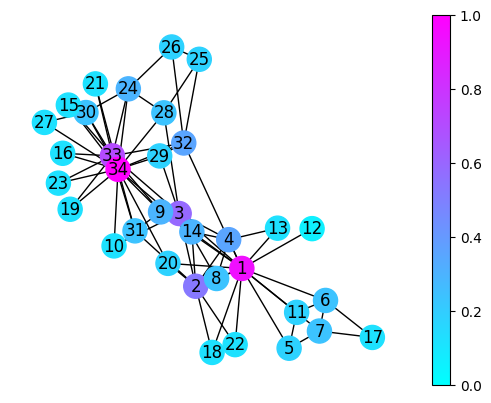

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
cmap = mpl.cm.cool
fig, ax = plt.subplots()
nx.draw(G, ax=ax, labels=labels, node_color=color, cmap=cmap, vmin=0, vmax=1)
fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap), ax=ax)
plt.show()